Taller pruebas de hipotesis

Integrantes:



*   Jose Isaac Leal - 2181579
*   Jose Luis Soto Soto - 2181583
*   Diego Fernando Landinez Leon - 2180036



##Librerias y demás

In [ ]:
install.packages('TeachingDemos')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(TeachingDemos)

In [ ]:
args(z.test)

function (x, mu = 0, stdev, alternative = c("two.sided", "less", 
    "greater"), sd = stdev, n = length(x), conf.level = 0.95, 
    ...) 
NULL

In [ ]:
args(t.test)

function (x, ...) 
NULL

In [ ]:
# Veamos la función que vamos a usar:
args(prop.test)

function (x, n, p = NULL, alternative = c("two.sided", "less", 
    "greater"), conf.level = 0.95, correct = TRUE) 
NULL

##Dataset y tratamiento de datos

In [ ]:
library(readr)


In [ ]:
url_ds <- 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv' 
arabica_data_cleaned <- read_csv(url_ds)
df.arabica_data_cleaned <- data.frame(arabica_data_cleaned)
head(df.arabica_data_cleaned)

New names:
• `` -> `...1`
Rows: 1311 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): Species, Owner, Country.of.Origin, Farm.Name, Lot.Number, Mill, IC...
dbl (20): ...1, Number.of.Bags, Aroma, Flavor, Aftertaste, Acidity, Body, Ba...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 Species Owner                    Country.of.Origin
1 1    Arabica metad plc                Ethiopia         
2 2    Arabica metad plc                Ethiopia         
3 3    Arabica grounds for health admin Guatemala        
4 4    Arabica yidnekachew dabessa      Ethiopia         
5 5    Arabica metad plc                Ethiopia         
6 6    Arabica ji-ae ahn                Brazil           
  Farm.Name                                Lot.Number Mill      ICO.Number
1 metad plc                                NA         metad plc 2014/2015 
2 metad plc                                NA         metad plc 2014/2015 
3 san marcos barrancas "san cristobal cuch NA         NA        NA        
4 yidnekachew dabessa coffee plantation    NA         wolensu   NA        
5 metad plc                                NA         metad plc 2014/2015 
6 NA                                       NA         NA        NA        
  Company                               Altitude      ⋯ Color       
1 metad agricultural developmet plc     1950-2200     ⋯ Green       
2 metad agricultural developmet plc     1950-2200     ⋯ Green       
3 NA                                    1600 - 1800 m ⋯ NA          
4 yidnekachew debessa coffee plantation 1800-2200     ⋯ Green       
5 metad agricultural developmet plc     1950-2200     ⋯ Green       
6 NA                                    NA            ⋯ Bluish-Green
  Category.Two.Defects Expiration          Certification.Body                
1 0                    April 3rd, 2016     METAD Agricultural Development plc
2 1                    April 3rd, 2016     METAD Agricultural Development plc
3 0                    May 31st, 2011      Specialty Coffee Association      
4 2                    March 25th, 2016    METAD Agricultural Development plc
5 2                    April 3rd, 2016     METAD Agricultural Development plc
6 1                    September 3rd, 2014 Specialty Coffee Institute of Asia
  Certification.Address                   
1 309fcf77415a3661ae83e027f7e5f05dad786e44
2 309fcf77415a3661ae83e027f7e5f05dad786e44
3 36d0d00a3724338ba7937c52a378d085f2172daa
4 309fcf77415a3661ae83e027f7e5f05dad786e44
5 309fcf77415a3661ae83e027f7e5f05dad786e44
6 726e4891cf2c9a4848768bd34b668124d12c4224
  Certification.Contact                    unit_of_measurement
1 19fef5a731de2db57d16da10287413f5f99bc2dd m                  
2 19fef5a731de2db57d16da10287413f5f99bc2dd m                  
3 0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660 m                  
4 19fef5a731de2db57d16da10287413f5f99bc2dd m                  
5 19fef5a731de2db57d16da10287413f5f99bc2dd m                  
6 b70da261fcc84831e3e9620c30a8701540abc200 m                  
  altitude_low_meters altitude_high_meters altitude_mean_meters
1 1950                2200                 2075                
2 1950                2200                 2075                
3 1600                1800                 1700                
4 1800                2200                 2000                
5 1950                2200                 2075                
6   NA                  NA                   NA

In [ ]:
str(df.arabica_data_cleaned)

'data.frame':	1311 obs. of  44 variables:
 $ ...1                 : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Species              : chr  "Arabica" "Arabica" "Arabica" "Arabica" ...
 $ Owner                : chr  "metad plc" "metad plc" "grounds for health admin" "yidnekachew dabessa" ...
 $ Country.of.Origin    : chr  "Ethiopia" "Ethiopia" "Guatemala" "Ethiopia" ...
 $ Farm.Name            : chr  "metad plc" "metad plc" "san marcos barrancas \"san cristobal cuch" "yidnekachew dabessa coffee plantation" ...
 $ Lot.Number           : chr  NA NA NA NA ...
 $ Mill                 : chr  "metad plc" "metad plc" NA "wolensu" ...
 $ ICO.Number           : chr  "2014/2015" "2014/2015" NA NA ...
 $ Company              : chr  "metad agricultural developmet plc" "metad agricultural developmet plc" NA "yidnekachew debessa coffee plantation" ...
 $ Altitude             : chr  "1950-2200" "1950-2200" "1600 - 1800 m" "1800-2200" ...
 $ Region               : chr  "guji-hambela" "guji-hambela" NA "oromia" ..

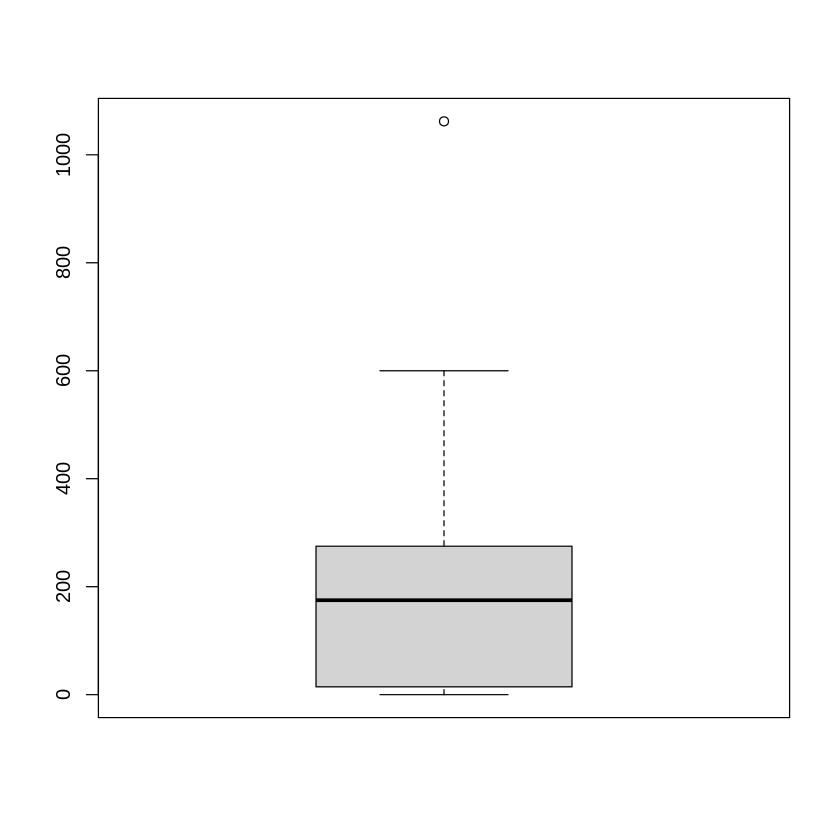

In [ ]:
boxplot(df.arabica_data_cleaned$Number.of.Bags)

In [ ]:
summary(df.arabica_data_cleaned)

      ...1          Species             Owner           Country.of.Origin 
 Min.   :   1.0   Length:1311        Length:1311        Length:1311       
 1st Qu.: 328.5   Class :character   Class :character   Class :character  
 Median : 656.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 656.0                                                           
 3rd Qu.: 983.5                                                           
 Max.   :1312.0                                                           
                                                                          
  Farm.Name          Lot.Number            Mill            ICO.Number       
 Length:1311        Length:1311        Length:1311        Length:1311       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [ ]:
url_ds <- 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_ratings_raw.csv'
arabica_ratings_raw <- read_csv(url_ds)
df.arabica_ratings_raw <- data.frame(arabica_ratings_raw)
head(df.arabica_ratings_raw)

New names:
• `` -> `...1`
• `` -> `...52`
Rows: 1312 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (31): Species, Owner, Country of Origin, Farm Name, Lot Number, Mill, IC...
dbl (14): ...1, quality_score, Number of Bags, Aroma, Flavor, Aftertaste, Ac...
lgl  (8): view_certificate_1, view_certificate_2, Cupping Protocol and Descr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 quality_score view_certificate_1 view_certificate_2
1 0    90.58         NA                 NA                
2 1    89.92         NA                 NA                
3 2    89.75         NA                 NA                
4 3    89.00         NA                 NA                
5 4    88.83         NA                 NA                
6 5    88.83         NA                 NA                
  Cupping.Protocol.and.Descriptors View.Green.Analysis.Details Request.a.Sample
1 NA                               NA                          NA              
2 NA                               NA                          NA              
3 NA                               NA                          NA              
4 NA                               NA                          NA              
5 NA                               NA                          NA              
6 NA                               NA                          NA              
  Species Owner                    Country.of.Origin ⋯ Quakers Color       
1 Arabica metad plc                Ethiopia          ⋯ 0       Green       
2 Arabica metad plc                Ethiopia          ⋯ 0       Green       
3 Arabica Grounds for Health Admin Guatemala         ⋯ 0       NA          
4 Arabica Yidnekachew Dabessa      Ethiopia          ⋯ 0       Green       
5 Arabica metad plc                Ethiopia          ⋯ 0       Green       
6 Arabica Ji-Ae Ahn                Brazil            ⋯ 0       Bluish-Green
  Category.Two.Defects NA.3 Expiration         
1 0 full defects       NA   April 3rd, 2016    
2 1 full defects       NA   April 3rd, 2016    
3 0 full defects       NA   May 31st, 2011     
4 2 full defects       NA   March 25th, 2016   
5 2 full defects       NA   April 3rd, 2016    
6 1 full defects       NA   September 3rd, 2014
  Certification.Body                
1 METAD Agricultural Development plc
2 METAD Agricultural Development plc
3 Specialty Coffee Association      
4 METAD Agricultural Development plc
5 METAD Agricultural Development plc
6 Specialty Coffee Institute of Asia
  Certification.Address                                                
1 BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia                
2 BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia                
3 117 W 4th St, Suite 300 Santa Ana, CA 92701                          
4 BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia                
5 BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia                
6 3F, 259-1 Ulgiro-3-ga, Joong-gu, Seoul, South Korea, Zip code:100-847
  Certification.Contact                                               ...52
1 Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196       NA   
2 Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196       NA   
3 Chris Buck - (562) 624-4100                                         NA   
4 Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196       NA   
5 Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196       NA   
6 Sung-Yong Steven Kil - 82-10-7912-1456-English, 82-2269-1456-Korean NA   
  Notes
1 NA   
2 NA   
3 NA   
4 NA   
5 NA   
6 NA

In [ ]:
url_ds <- 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv' 
robusta_data_cleaned <- read_csv(url_ds)
df.robusta_data_cleaned <- data.frame(robusta_data_cleaned)
head(df.robusta_data_cleaned)

New names:
• `` -> `...1`
Rows: 28 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): Species, Owner, Country.of.Origin, Farm.Name, Lot.Number, Mill, IC...
dbl (21): ...1, Number.of.Bags, Harvest.Year, Fragrance...Aroma, Flavor, Aft...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 Species Owner                        Country.of.Origin
1 1    Robusta ankole coffee producers coop Uganda           
2 2    Robusta nishant gurjer               India            
3 3    Robusta andrew hetzel                India            
4 4    Robusta ugacof                       Uganda           
5 5    Robusta katuka development trust ltd Uganda           
6 6    Robusta andrew hetzel                India            
  Farm.Name                          Lot.Number Mill                    
1 kyangundu cooperative society      NA         ankole coffee producers 
2 sethuraman estate kaapi royale     25         sethuraman estate       
3 sethuraman estate                  NA         NA                      
4 ugacof project area                NA         ugacof                  
5 katikamu capca farmers association NA         katuka development trust
6 NA                                 NA         (self)                  
  ICO.Number      Company                      Altitude  ⋯ Color
1 0               ankole coffee producers coop 1488      ⋯ Green
2 14/1148/2017/21 kaapi royale                 3170      ⋯ NA   
3 0000            sethuraman estate            1000m     ⋯ Green
4 0               ugacof ltd                   1212      ⋯ Green
5 0               katuka development trust ltd 1200-1300 ⋯ Green
6 NA              cafemakers, llc              3000'     ⋯ Green
  Category.Two.Defects Expiration          Certification.Body                 
1 2                    June 26th, 2015     Uganda Coffee Development Authority
2 2                    October 31st, 2018  Specialty Coffee Association       
3 0                    April 29th, 2016    Specialty Coffee Association       
4 7                    July 14th, 2015     Uganda Coffee Development Authority
5 3                    June 26th, 2015     Uganda Coffee Development Authority
6 0                    February 28th, 2013 Specialty Coffee Association       
  Certification.Address                   
1 e36d0270932c3b657e96b7b0278dfd85dc0fe743
2 ff7c18ad303d4b603ac3f8cff7e611ffc735e720
3 ff7c18ad303d4b603ac3f8cff7e611ffc735e720
4 e36d0270932c3b657e96b7b0278dfd85dc0fe743
5 e36d0270932c3b657e96b7b0278dfd85dc0fe743
6 ff7c18ad303d4b603ac3f8cff7e611ffc735e720
  Certification.Contact                    unit_of_measurement
1 03077a1c6bac60e6f514691634a7f6eb5c85aae8 m                  
2 352d0cf7f3e9be14dad7df644ad65efc27605ae2 m                  
3 352d0cf7f3e9be14dad7df644ad65efc27605ae2 m                  
4 03077a1c6bac60e6f514691634a7f6eb5c85aae8 m                  
5 03077a1c6bac60e6f514691634a7f6eb5c85aae8 m                  
6 352d0cf7f3e9be14dad7df644ad65efc27605ae2 m                  
  altitude_low_meters altitude_high_meters altitude_mean_meters
1 1488                1488                 1488                
2 3170                3170                 3170                
3 1000                1000                 1000                
4 1212                1212                 1212                
5 1200                1300                 1250                
6 3000                3000                 3000

In [ ]:
url_ds <- 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_ratings_raw.csv'
robusta_ratings_raw <- read_csv(url_ds)
df.robusta_ratings_raw <- data.frame(robusta_ratings_raw)
df.robusta_ratings_raw

New names:
• `` -> `...1`
• `Owner` -> `Owner...9`
• `Owner` -> `Owner...24`
• `NA` -> `NA...28`
• `NA` -> `NA...35`
• `NA` -> `NA...41`
• `NA` -> `NA...47`
Rows: 28 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): Species, Owner...9, Country of Origin, Farm Name, Lot Number, Mill...
dbl (15): ...1, quality_score, Number of Bags, Harvest Year, Fragrance / Aro...
lgl  (7): view_certificate_1, view_certificate_2, Cupping Protocol and Descr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 quality_score view_certificate_1 view_certificate_2
1  0    83.75         NA                 NA                
2  0    83.50         NA                 NA                
3  0    83.25         NA                 NA                
4  0    83.00         NA                 NA                
5  0    83.00         NA                 NA                
6  0    82.75         NA                 NA                
7  0    82.58         NA                 NA                
8  0    82.50         NA                 NA                
9  0    82.50         NA                 NA                
10 0    82.42         NA                 NA                
11 0    81.75         NA                 NA                
12 0    81.58         NA                 NA                
13 0    81.58         NA                 NA                
14 0    81.50         NA                 NA                
15 0    81.50         NA                 NA                
16 0    81.42         NA                 NA                
17 0    81.25         NA                 NA                
18 0    80.92         NA                 NA                
19 0    80.58         NA                 NA                
20 0    80.50         NA                 NA                
21 0    80.17         NA                 NA                
22 0    80.17         NA                 NA                
23 0    79.33         NA                 NA                
24 0    78.75         NA                 NA                
25 0    78.08         NA                 NA                
26 0    77.17         NA                 NA                
27 0    75.08         NA                 NA                
28 0    73.75         NA                 NA                
   Cupping.Protocol.and.Descriptors View.Green.Analysis.Details
1  NA                               NA                         
2  NA                               NA                         
3  NA                               NA                         
4  NA                               NA                         
5  NA                               NA                         
6  NA                               NA                         
7  NA                               NA                         
8  NA                               NA                         
9  NA                               NA                         
10 NA                               NA                         
11 NA                               NA                         
12 NA                               NA                         
13 NA                               NA                         
14 NA                               NA                         
15 NA                               NA                         
16 NA                               NA                         
17 NA                               NA                         
18 NA                               NA                         
19 NA                               NA                         
20 NA                               NA                         
21 NA                               NA                         
22 NA                               NA                         
23 NA                               NA                         
24 NA                               NA                         
25 NA                               NA                         
26 NA                               NA                         
27 NA                               NA                         
28 NA                               NA                         
   Request.a.Sample Species Owner...9                         Country.of.Origin
1  NA               Robusta Ankole coffee producers coop      Uganda           
2  NA               Robusta Nishant Gurjer                    India            
3  NA               Robusta Andrew Hetzel                     India            
4  NA               Robusta UGACOF                            Uganda           
5  NA  

Las tablas de informacion cleaned contiene las siguientes variables:

* Species
* Owner
* Country.of.Origin
* ICO.Number
* Company
* Altitude
* Region
* Number.of.Bags
* Bag.Weight
* In.Country.Partner
* Harvest.Year
* Grading.Date
* Owner.1
* Variety
* Processing.Method
* Aroma
* Flavor
* Aftertaste
* Acidity
* Body
* Balance
* Uniformity
* Sweetness
* Moisture
* Quakers
* Color
* Expiration
* unit_of_measurement
* altitude_low_meters
* altitude_high_meters
* altitude_mean_meters

Las tablas de informacion raw contiene las siguientes variables:

* quality_score 
* Cupping Protocol and Descriptors
* View Green Analysis Details
* Request a Sample
* Species
* Owner
* Country of Origin
* Farm Name
* Lot Number
* Mill
* ICO Number
* Company
* Altitude
* Region
* Producer
* Number of Bags
* Bag Weight
* In-Country Partner
* Harvest Year
* Grading Date
* Owner.1
* Variety
* Status
* Processing Method
* NA
* Aroma
* Flavor
* Aftertaste
* Acidity
* Body
* Balance
* NA.1
* Uniformity
* Clean Cup
* Sweetness
* Cupper Points
* Total Cup Points
* NA.2
* Moisture
* Category One Defects
* Quakers
* Color
* Category Two Defects
* NA.3
* Expiration
* Certification Body
* Certification Address
* Certification Contact
* Notes

In [ ]:
ADC <- df.arabica_data_cleaned[ , c('Species',
                                    'Country.of.Origin',
                                    'Aroma',
                                    'Flavor',
                                    'Aftertaste',
                                    'Acidity',
                                    'Balance',
                                    'Sweetness',
                                    'Clean.Cup',
                                    'Body',
                                    'Uniformity',
                                    'Cupper.Points',
                                    'Total.Cup.Points'
                                    )]
df.ADC <- data.frame(ADC)

In [ ]:
ARW <- df.arabica_ratings_raw[ , c( 'Species',
                                    'Country.of.Origin',
                                    'Aroma',
                                    'Flavor',
                                    'Aftertaste',
                                    'Acidity',
                                    'Sweetness',
                                    'Body',
                                    'Balance',
                                    'Uniformity',
                                    'Clean.Cup',
                                    'Cupper.Points'
                                    )]
df.ARW <- data.frame(ARW)

In [ ]:
library(tidyr)
library(stringr)
a <- str_split_fixed(df.arabica_ratings_raw$Total.Cup.Points, " ",2)
PuntosTotales <- data.frame(as.numeric(a[,2]))
names(PuntosTotales)[1] = "Total.Cup.Points"
df.ARW <- cbind(df.ARW, PuntosTotales)

In [ ]:
dataCleaned <- rbind(df.ADC, df.ARW)

In [ ]:
RDC <- df.robusta_data_cleaned[ , c('Species', 
                                    'Country.of.Origin',
                                    'Fragrance...Aroma',
                                    'Flavor',
                                    'Aftertaste',
                                    'Salt...Acid',
                                    'Balance',
                                    'Bitter...Sweet',
                                    'Clean.Cup',
                                    'Mouthfeel',
                                    'Uniform.Cup',
                                    'Cupper.Points',
                                    'Total.Cup.Points'
                                    )]
df.RDC <- data.frame(RDC)

In [ ]:
RRW <- df.robusta_ratings_raw[ , c( 'Species', 
                                    'Country.of.Origin',
                                    'Fragrance...Aroma',
                                    'Flavor',
                                    'Aftertaste',
                                    'Salt...Acid',
                                    'Balance',
                                    'Bitter...Sweet',
                                    'Clean.Cup',
                                    'Mouthfeel',
                                    'Uniform.Cup',
                                    'Cupper.Points'
                                    )]
df.RRW <- data.frame(RRW)

In [ ]:
library(tidyr)
library(stringr)
b <- str_split_fixed(df.robusta_ratings_raw$Total.Cup.Points, " ",2)
PuntosTotales2 <- data.frame(as.numeric(b[,2]))
names(PuntosTotales2)[1] = "Total.Cup.Points"
df.RRW <- cbind(df.RRW, PuntosTotales2)


In [ ]:
ratingsRaw <- rbind(df.RDC, df.RRW)

In [ ]:
names(ratingsRaw)[3] = "Aroma"
names(ratingsRaw)[6] = "Acidity"
names(ratingsRaw)[8] = "Sweetness"
names(ratingsRaw)[11] = "Uniformity"
names(dataCleaned)[10] = "Mouthfeel"


In [ ]:
names(ratingsRaw)

[1] "Species"           "Country.of.Origin" "Aroma"            
 [4] "Flavor"            "Aftertaste"        "Acidity"          
 [7] "Balance"           "Sweetness"         "Clean.Cup"        
[10] "Mouthfeel"         "Uniformity"        "Cupper.Points"    
[13] "Total.Cup.Points"

In [ ]:
allData <- rbind(dataCleaned,
                     ratingsRaw)
summary(allData)

   Species          Country.of.Origin      Aroma           Flavor    
 Length:2679        Length:2679        Min.   :0.000   Min.   :0.00  
 Class :character   Class :character   1st Qu.:7.420   1st Qu.:7.33  
 Mode  :character   Mode  :character   Median :7.580   Median :7.58  
                                       Mean   :7.566   Mean   :7.52  
                                       3rd Qu.:7.750   3rd Qu.:7.75  
                                       Max.   :8.750   Max.   :8.83  
   Aftertaste       Acidity         Balance        Sweetness     
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   : 0.000  
 1st Qu.:7.250   1st Qu.:7.330   1st Qu.:7.330   1st Qu.:10.000  
 Median :7.420   Median :7.580   Median :7.500   Median :10.000  
 Mean   :7.401   Mean   :7.535   Mean   :7.517   Mean   : 9.853  
 3rd Qu.:7.580   3rd Qu.:7.750   3rd Qu.:7.750   3rd Qu.:10.000  
 Max.   :8.670   Max.   :8.750   Max.   :8.750   Max.   :10.000  
   Clean.Cup        Mouthfeel       Uniformity  

In [ ]:
library(dplyr)
allData <- allData %>%
  mutate_if(is.character,factor)
str(allData)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	2679 obs. of  13 variables:
 $ Species          : Factor w/ 2 levels "Arabica","Robusta": 1 1 1 1 1 1 1 1 1 1 ...
 $ Country.of.Origin: Factor w/ 36 levels "Brazil","Burundi",..: 9 9 10 9 9 1 25 9 9 9 ...
 $ Aroma            : num  8.67 8.75 8.42 8.17 8.25 8.58 8.42 8.25 8.67 8.08 ...
 $ Flavor           : num  8.83 8.67 8.5 8.58 8.5 8.42 8.5 8.33 8.67 8.58 ...
 $ Aftertaste       : num  8.67 8.5 8.42 8.42 8.25 8.42 8.33 8.5 8.58 8.5 ...
 $ Acidity          : num  8.75 8.58 8.42 8.42 8.5 8.5 8.5 8.42 8.42 8.5 ...
 $ Balance          : num  8.42 8.42 8.42 8.25 8.33 8.33 8.25 8.5 8.42 8.42 ...
 $ Sweetness        : num  10 10 10 10 10 10 10 9.33 9.33 10 ...
 $ Clean.Cup        : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Mouthfeel        : num  8.5 8.42 8.33 8.5 8.42 8.25 8.25 8.33 8.33 7.67 ...
 $ Uniformity       : num  10 10 10 10 10 10 10 10 9.33 10 ...
 $ Cupper.Points    : num  8.75 8.58 9.25 8.67 8.58 8.33 8.5 9 8.67 8.5 ...
 $ Total.Cup.Points : num  90.6 89.9 89.8 8

In [ ]:
allData <- na.omit(allData)
dim(allData)

[1] 2677   13

In [ ]:
library(tidyr)
library(stringr)
Altitud_ADC <- df.arabica_data_cleaned[ , c('Species', 'Country.of.Origin','altitude_mean_meters')]

df.Altitud_AD <- data.frame(Altitud_ADC)

In [ ]:
Altitud_RDC <- df.robusta_data_cleaned[ , c('Species', 'Country.of.Origin','altitude_mean_meters')]

df.Altitud_RD <- data.frame(Altitud_RDC)


In [ ]:

Altitude <- rbind(df.Altitud_AD, df.Altitud_RD)
Altitude <- na.omit(Altitude)
summary(Altitude)

   Species          Country.of.Origin  altitude_mean_meters
 Length:1109        Length:1109        Min.   :     1      
 Class :character   Class :character   1st Qu.:  1100      
 Mode  :character   Mode  :character   Median :  1311      
                                       Mean   :  1775      
                                       3rd Qu.:  1600      
                                       Max.   :190164      

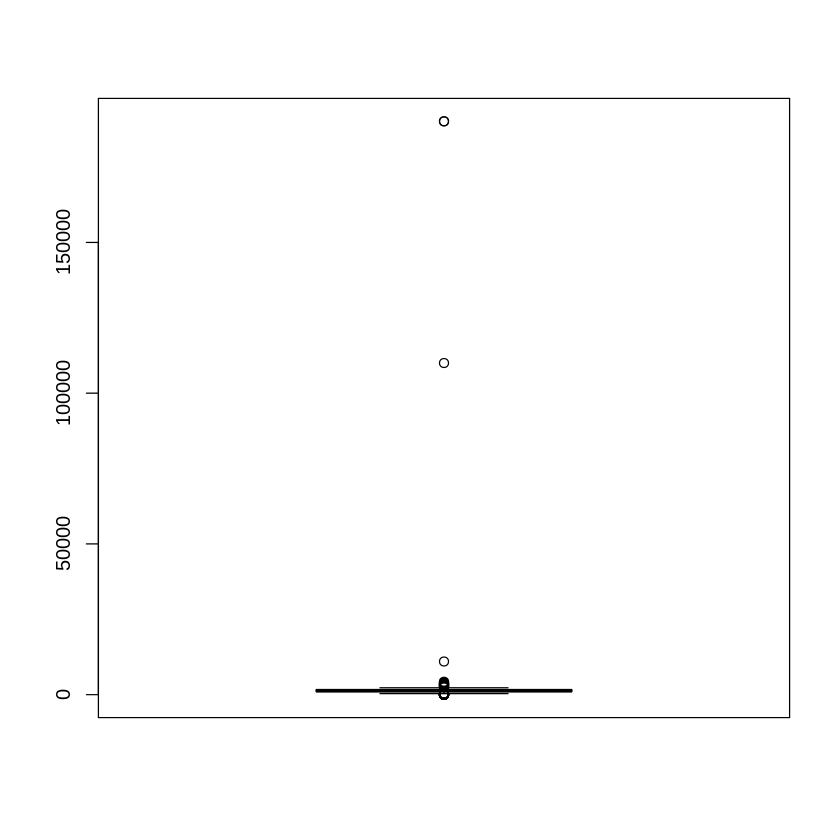

In [ ]:
boxplot(Altitude$altitude_mean_meters)

IQR = Q3 – Q1 = 1600 – 1100 = 500

Q1 - 1,5 · IQR  = 350 

Q3 + 1,5 · IQR  = 2350


In [ ]:
# reemplazo de outliers con R
outliersReplace <- function(data, lowLimit, highLimit){
  data[data < lowLimit] <- mean(data)
  data[data > highLimit] <- median(data)
  data     #devolvemos el dato       
}

Altitude_mean <- outliersReplace(Altitude$altitude_mean_meters, 350, 2350)
 
summary(Altitude_mean)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    350    1188    1380    1363    1650    2285 

In [ ]:
Altitude1 <- Altitude[ , c('Species', 'Country.of.Origin')]
df.Altitude1 <- data.frame(Altitude1)
Altitude_means <- as.numeric(Altitude_mean)
df.Altitude <- cbind(df.Altitude1, Altitude_means)
df.Altitude 

Species Country.of.Origin      Altitude_means
1    Arabica Ethiopia               2075.0        
2    Arabica Ethiopia               2075.0        
3    Arabica Guatemala              1700.0        
4    Arabica Ethiopia               2000.0        
5    Arabica Ethiopia               2075.0        
8    Arabica Ethiopia               1635.0        
9    Arabica Ethiopia               1635.0        
10   Arabica Ethiopia               1822.5        
11   Arabica Ethiopia               1905.0        
12   Arabica United States          1872.0        
13   Arabica United States          1943.0        
14   Arabica United States (Hawaii)  609.6        
15   Arabica Ethiopia               1635.0        
16   Arabica United States          2080.0        
17   Arabica Indonesia              1500.0        
19   Arabica China                  1450.0        
20   Arabica Ethiopia               1850.0        
21   Arabica United States          2019.0        
22   Arabica Costa Rica             1300.0        
23   Arabica Mexico                 1320.0        
24   Arabica United States          2112.0        
26   Arabica Brazil                 1250.0        
28   Arabica Uganda                 1950.0        
29   Arabica Honduras               1400.0        
30   Arabica Taiwan                 1200.0        
33   Arabica Brazil                 1300.0        
34   Arabica Costa Rica             1300.0        
35   Arabica Ethiopia               1775.0        
36   Arabica Kenya                  1800.0        
40   Arabica United States          1941.0        
⋮    ⋮       ⋮                      ⋮             
1307 Arabica Mexico                  900.000      
1308 Arabica Haiti                   350.000      
1309 Arabica Nicaragua              1100.000      
1310 Arabica Guatemala              1417.320      
1311 Arabica Honduras               1400.000      
1312 Robusta Uganda                 1488.000      
1313 Robusta India                  1380.000      
1314 Robusta India                  1000.000      
1315 Robusta Uganda                 1212.000      
1316 Robusta Uganda                 1250.000      
1317 Robusta India                  1380.000      
1318 Robusta India                   750.000      
1319 Robusta India                  1380.000      
1320 Robusta India                  1000.000      
1321 Robusta Uganda                 1100.000      
1322 Robusta Uganda                 1095.000      
1323 Robusta India                  1000.000      
1324 Robusta India                   750.000      
1325 Robusta Uganda                 1367.000      
1326 Robusta Uganda                 1488.000      
1327 Robusta India                  1000.000      
1328 Robusta India                   750.000      
1329 Robusta Uganda                 1600.000      
1330 Robusta Uganda                 1745.000      
1331 Robusta Uganda                 1200.000      
1332 Robusta India                   750.000      
1333 Robusta India                   750.000      
1334 Robusta United States          1380.000      
1336 Robusta Ecuador                1775.031      
1337 Robusta United States           795.000

In [ ]:
library(dplyr)
df.Altitude <- df.Altitude %>%
  mutate_if(is.character,factor)
str(df.Altitude)

'data.frame':	1109 obs. of  3 variables:
 $ Species          : Factor w/ 2 levels "Arabica","Robusta": 1 1 1 1 1 1 1 1 1 1 ...
 $ Country.of.Origin: Factor w/ 36 levels "Brazil","Burundi",..: 9 9 10 9 9 9 9 9 9 32 ...
 $ Altitude_means   : num  2075 2075 1700 2000 2075 ...


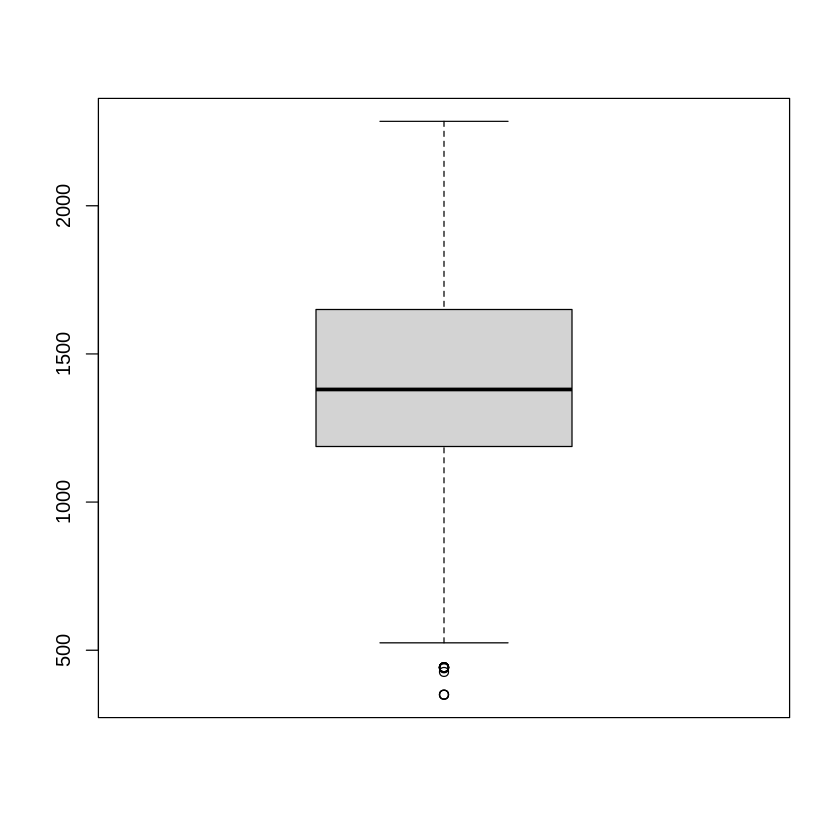

In [ ]:
boxplot(df.Altitude$Altitude_mean)

In [ ]:
Arabica <- nrow(df.Altitude[df.Altitude$Species=='Arabica' & df.Altitude$Altitude_mean <= 1380,])
Arabica
Arabica/nrow(df.Altitude[df.Altitude$Species=='Arabica',])


[1] 558

[1] 0.5147601

In [ ]:
Robusta <- nrow(df.Altitude[df.Altitude$Species=='Robusta' & df.Altitude$Altitude_mean <= 1380,])
Robusta
Robusta/nrow(df.Altitude[df.Altitude$Species=='Robusta',])

[1] 20

[1] 0.8

##1.Prueba de hipótesis para la media de una muestra con varianza conocida

In [ ]:
Colombia <- allData[allData$Country.of.Origin == 'Colombia',]

In [ ]:
summary(Colombia)

    Species        Country.of.Origin     Aroma           Flavor     
 Arabica:366   Colombia     :366     Min.   :5.080   Min.   :7.000  
 Robusta:  0   Brazil       :  0     1st Qu.:7.580   1st Qu.:7.500  
               Burundi      :  0     Median :7.670   Median :7.580  
               China        :  0     Mean   :7.653   Mean   :7.597  
               Costa Rica   :  0     3rd Qu.:7.750   3rd Qu.:7.670  
               Cote d?Ivoire:  0     Max.   :8.170   Max.   :8.080  
               (Other)      :  0                                    
   Aftertaste       Acidity        Balance        Sweetness     
 Min.   :6.750   Min.   :5.25   Min.   :7.170   Min.   : 6.670  
 1st Qu.:7.420   1st Qu.:7.42   1st Qu.:7.580   1st Qu.:10.000  
 Median :7.580   Median :7.58   Median :7.670   Median :10.000  
 Mean   :7.525   Mean   :7.56   Mean   :7.708   Mean   : 9.953  
 3rd Qu.:7.670   3rd Qu.:7.75   3rd Qu.:7.830   3rd Qu.:10.000  
 Max.   :8.000   Max.   :8.17   Max.   :8.580   Max.   :10

H0: El café colombiano tiene un puntaje mayor a 80 en el total de los puntos

Cómo queda la hipótesis:
$$
H0: \overline{Colombia}≥80
$$
$$
H1:\overline{Colombia}<80$$

In [ ]:
# Primero, la prueba que considera la varianza conocida
z.test(Colombia$Total.Cup.Points, mu=80, sd = sd(Colombia$Total.Cup.Points), alternative = "less", conf.level = 0.75)


	One Sample z-test

data:  Colombia$Total.Cup.Points
z = 42.11, n = 366.000000, Std. Dev. = 1.411336, Std. Dev. of the
sample mean = 0.073772, p-value = 1
alternative hypothesis: true mean is less than 80
75 percent confidence interval:
     -Inf 83.15632
sample estimates:
mean of Colombia$Total.Cup.Points 
                         83.10656 


Aceptamos la hipótesis nula y con un nivel de significancia α=0.25  la evidencia sugiere que el puntaje promedio del total de puntos por tazas de cafe colombiano es mayor a 80

In [ ]:
# Primero, la prueba que considera la varianza conocida
z.test(Colombia$Total.Cup.Points, mu=80, sd = sd(Colombia$Total.Cup.Points), alternative = "less", conf.level = 0.85)


	One Sample z-test

data:  Colombia$Total.Cup.Points
z = 42.11, n = 366.000000, Std. Dev. = 1.411336, Std. Dev. of the
sample mean = 0.073772, p-value = 1
alternative hypothesis: true mean is less than 80
85 percent confidence interval:
     -Inf 83.18302
sample estimates:
mean of Colombia$Total.Cup.Points 
                         83.10656 


Aceptamos la hipótesis nula y con un nivel de significancia α=0.15  la evidencia sugiere que el puntaje promedio del total de puntos por tazas de cafe colombiano es mayor a 80

In [ ]:
# Primero, la prueba que considera la varianza conocida
z.test(Colombia$Total.Cup.Points, mu=80, sd = sd(Colombia$Total.Cup.Points), alternative = "less", conf.level = 0.99)


	One Sample z-test

data:  Colombia$Total.Cup.Points
z = 42.11, n = 366.000000, Std. Dev. = 1.411336, Std. Dev. of the
sample mean = 0.073772, p-value = 1
alternative hypothesis: true mean is less than 80
99 percent confidence interval:
     -Inf 83.27818
sample estimates:
mean of Colombia$Total.Cup.Points 
                         83.10656 


Aceptamos la hipótesis nula y con un nivel de significancia α=0.01  la evidencia sugiere que el puntaje promedio del total de puntos por tazas de cafe colombiano es mayor a 80

##2.Prueba de hipotesis para la proporción de una muestra

H0: La proporcion cafe cuya especie es arabica se cultiva a mayor altura que la media es mayor a 60 %

Cómo queda la hipótesis:
$$
H0: \overline{Arabica}≥60%
$$
$$
H1:\overline{Arabica}<60%$$

In [ ]:
Arabica <- nrow(df.Altitude[df.Altitude$Species=='Arabica' & df.Altitude$Altitude_mean >= 1380,])
Arabica
Arabica/nrow(df.Altitude[df.Altitude$Species=='Arabica',])

[1] 546

[1] 0.50369

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Arabica, 
          nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          p = 0.6,
          alternative = "less", conf.level = 0.80, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Arabica out of nrow(df.Altitude[df.Altitude$Species == "Arabica", ]), null probability 0.6
X-squared = 41.495, df = 1, p-value = 5.91e-11
alternative hypothesis: true p is less than 0.6
80 percent confidence interval:
 0.0000000 0.5169252
sample estimates:
      p 
0.50369 


se rechaza la hipotesis nula y con un nivel de significancia $a=0.2$ la evidencia sugiere que la proporcion cafe de especie arabica es cultivada a mayor altura que la media es menor al 60%

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Arabica, 
          nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          p = 0.6,
          alternative = "less", conf.level = 0.90, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Arabica out of nrow(df.Altitude[df.Altitude$Species == "Arabica", ]), null probability 0.6
X-squared = 41.495, df = 1, p-value = 5.91e-11
alternative hypothesis: true p is less than 0.6
90 percent confidence interval:
 0.0000000 0.5235918
sample estimates:
      p 
0.50369 


se rechaza la hipotesis nula y con un nivel de significancia $a=0.1$ la evidencia sugiere que la proporcion cafe de especie arabica es cultivada a mayor altura que la media es menor al 60%

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Arabica, 
          nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          p = 0.6,
          alternative = "less", conf.level = 0.99, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Arabica out of nrow(df.Altitude[df.Altitude$Species == "Arabica", ]), null probability 0.6
X-squared = 41.495, df = 1, p-value = 5.91e-11
alternative hypothesis: true p is less than 0.6
99 percent confidence interval:
 0.0000000 0.5393705
sample estimates:
      p 
0.50369 


se rechaza la hipotesis nula y con un nivel de significancia $a=0.01$ la evidencia sugiere que la proporcion cafe de especie arabica es cultivada a mayor altura que la media es menor al 60%

##3.Prueba de hipotesis para la media de una muestra con varianza desconocida

In [ ]:
EstadosUnidos <- allData[allData$Country.of.Origin == 'United States',]

H0: El café estadounidense tiene un puntaje de aroma mayor a 8 de 10

Cómo queda la hipótesis:
$$
H0: \overline{United States}≥8 puntos
$$
$$
H1:\overline{United States}<8puntos$$

In [ ]:
t.test(EstadosUnidos$Aroma, 8, alternative = 'less', var.equal = TRUE, col_level = 0.7)


	Two Sample t-test

data:  EstadosUnidos$Aroma and 8
t = -0.47764, df = 19, p-value = 0.3192
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4349516
sample estimates:
mean of x mean of y 
    7.834     8.000 


aceptamos la hipotesis nula y con un nivel de significancia $a=0.3$ la evindecia sugiere que el cafe de estados unidos tiene un puntaje de aroma mayor a 8 puntos 

In [ ]:
t.test(EstadosUnidos$Aroma, 8, alternative = 'less', var.equal = TRUE, col_level = 0.80)


	Two Sample t-test

data:  EstadosUnidos$Aroma and 8
t = -0.47764, df = 19, p-value = 0.3192
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4349516
sample estimates:
mean of x mean of y 
    7.834     8.000 


aceptamos la hipotesis nula y con un nivel de significancia $a=0.2$ la evindecia sugiere que el cafe de estados unidos tiene un puntaje de aroma mayor a 8 puntos

In [ ]:
t.test(EstadosUnidos$Aroma, 8, alternative = 'less', var.equal = TRUE, col_level = 0.95)


	Two Sample t-test

data:  EstadosUnidos$Aroma and 8
t = -0.47764, df = 19, p-value = 0.3192
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4349516
sample estimates:
mean of x mean of y 
    7.834     8.000 


aceptamos la hipotesis nula y con un nivel de significancia $a=0.05$ la evindecia sugiere que el cafe de estados unidos tiene un puntaje de aroma mayor a 8 puntos

##4.Prueba de hipótesis para la diferencia de medias de dos muestras con varianzas iguales y desconocidas




In [ ]:
Otros <- allData[allData$Country.of.Origin != 'Colombia',]


H0: Los demás paises tienen mejor sabor de cafe

H1: El sabor del café colombiano es mejor que el de los demás países

Cómo queda la hipótesis:
$$
H0: \overline{Colombia}≤ \overline{Otros}
$$
$$
H1:\overline{Colombia}>\overline{Otros}$$

In [ ]:
# La segunda opción, varianza desconocida
t.test(Colombia$Flavor, Otros$Flavor, alternative = 'greater', var.equal = TRUE, col_level = 0.80)


	Two Sample t-test

data:  Colombia$Flavor and Otros$Flavor
t = 3.9678, df = 2675, p-value = 3.723e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.05198255        Inf
sample estimates:
mean of x mean of y 
 7.597104  7.508291 


rechazamos la hipotesis nula y con un nivel de confianza $a=0.2$ la evidencia indica que el sabor del cafe colombiano es mejor que el de los otros paises 

In [ ]:
# La segunda opción, varianza desconocida
t.test(Colombia$Flavor, Otros$Flavor, alternative = 'greater', var.equal = TRUE, col_level = 0.90)


	Two Sample t-test

data:  Colombia$Flavor and Otros$Flavor
t = 3.9678, df = 2675, p-value = 3.723e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.05198255        Inf
sample estimates:
mean of x mean of y 
 7.597104  7.508291 


rechazamos la hipotesis nula y con un nivel de confianza $a=0.1$ la evidencia indica que el sabor del cafe colombiano es mejor que el de los otros paises 

In [ ]:
# La segunda opción, varianza desconocida
t.test(Colombia$Flavor, Otros$Flavor, alternative = 'greater', var.equal = TRUE, col_level = 0.99)


	Two Sample t-test

data:  Colombia$Flavor and Otros$Flavor
t = 3.9678, df = 2675, p-value = 3.723e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.05198255        Inf
sample estimates:
mean of x mean of y 
 7.597104  7.508291 


rechazamos la hipotesis nula y con un nivel de confianza $a=0.01$ la evidencia indica que el sabor del cafe colombiano es mejor que el de los otros paises 

##5.Prueba de hipótesis para la diferencia de medias de dos muestras con varianzas desiguales y desconocidas

In [ ]:
ArabicaPoints <- allData[allData$Species == 'Arabica',]  
RobustaPoints <- allData[allData$Species == 'Robusta',]

H0: El café de la especie Robusta en puntaje total es peor que la especie Arabica

Cómo queda la hipótesis:
$$
H0: \overline{ Robusta}≤\overline{Arabica}
$$
$$
H1:\overline{ Robusta}>\overline{Arabica}$$

In [ ]:
# La segunda opción, varianza desconocida y desiguales 
t.test(RobustaPoints$Total.Cup.Points, ArabicaPoints$Total.Cup.Points, alternative = 'greater', var.equal = FALSE, col_level = 0.70)


	Welch Two Sample t-test

data:  RobustaPoints$Total.Cup.Points and ArabicaPoints$Total.Cup.Points
t = -3.7318, df = 60.315, p-value = 0.9998
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.787027       Inf
sample estimates:
mean of x mean of y 
 80.86893  82.10337 


aceptamos la prueba de hipotesis nula y con un nivel de confianza $a=0.3$ la evidencia indica el cafe de la especie robusta en puntaje total es peor que que la especie arabica

In [ ]:
# La segunda opción, varianza desconocida y desiguales
t.test(RobustaPoints$Total.Cup.Points, ArabicaPoints$Total.Cup.Points, alternative = 'greater', var.equal = FALSE, col_level = 0.80)


	Welch Two Sample t-test

data:  RobustaPoints$Total.Cup.Points and ArabicaPoints$Total.Cup.Points
t = -3.7318, df = 60.315, p-value = 0.9998
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.787027       Inf
sample estimates:
mean of x mean of y 
 80.86893  82.10337 


aceptamos la prueba de hipotesis nula y con un nivel de confianza $a=0.2$ la evidencia indica el cafe de la especie robusta en puntaje total es peor que que la especie arabica

In [ ]:
# La segunda opción, varianza desconocida y desiguales
t.test(RobustaPoints$Total.Cup.Points, ArabicaPoints$Total.Cup.Points, alternative = 'greater', var.equal = FALSE, col_level = 0.99)


	Welch Two Sample t-test

data:  RobustaPoints$Total.Cup.Points and ArabicaPoints$Total.Cup.Points
t = -3.7318, df = 60.315, p-value = 0.9998
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.787027       Inf
sample estimates:
mean of x mean of y 
 80.86893  82.10337 


aceptamos la prueba de hipotesis nula y con un nivel de confianza $a=0.01$ la evidencia indica el cafe de la especie robusta en puntaje total es peor que que la especie arabica

##6.Prueba de hipotesis para la diferencia de proporciones de dos muestras

Vamos a realizar la prueba de hipótesis, consideremos el planteamiento:

$$
H0:Robusta≥Arabica
$$
$$  
H1:Robusta<Arabica
$$
Tal como está descrito debemos reorganizar un poco la expresión
$$
H0:Robusta≥0.80  
$$
$$
H1:Arabica<0.80
$$
Esto porque requerimos tener un poco de claridad sobre cómo introducir los argumentos. Procedamos a realizar la prueba:

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Robusta, 
          nrow(df.Altitude[df.Altitude$Species=='Robusta',]),
          p = Arabica/nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          alternative = "less", conf.level = 0.80, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Robusta out of nrow(df.Altitude[df.Altitude$Species == "Robusta", ]), null probability Arabica/nrow(df.Altitude[df.Altitude$Species == "Arabica", ])
X-squared = 7.6351, df = 1, p-value = 0.9971
alternative hypothesis: true p is less than 0.50369
80 percent confidence interval:
 0.0000000 0.8755608
sample estimates:
  p 
0.8 


Con un nivel de significacian  α=0.2  la evidencia sugiere que la proporción de la altura menores a la media es mayor en Robusta que en Arabica.

Vamos a realizar la prueba de hipótesis, consideremos el planteamiento:

$$
H0:Robusta≥Arabica
$$
$$  
H1:Robusta<Arabica
$$
Tal como está descrito debemos reorganizar un poco la expresión
$$
H0:Robusta≥0.95  
$$
$$
H1:Arabica<0.95
$$
Esto porque requerimos tener un poco de claridad sobre cómo introducir los argumentos. Procedamos a realizar la prueba:

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Robusta, 
          nrow(df.Altitude[df.Altitude$Species=='Robusta',]),
          p = Arabica/nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          alternative = "less", conf.level = 0.95, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Robusta out of nrow(df.Altitude[df.Altitude$Species == "Robusta", ]), null probability Arabica/nrow(df.Altitude[df.Altitude$Species == "Arabica", ])
X-squared = 7.6351, df = 1, p-value = 0.9971
alternative hypothesis: true p is less than 0.50369
95 percent confidence interval:
 0.000000 0.912808
sample estimates:
  p 
0.8 


Con un nivel de significacian  α=0.05  la evidencia sugiere que la proporción de la altura menores a la media es mayor en Robusta que en Arabica.

Vamos a realizar la prueba de hipótesis, consideremos el planteamiento:

$$
H0:Robusta≥Arabica
$$
$$  
H1:Robusta<Arabica
$$
Tal como está descrito debemos reorganizar un poco la expresión
$$
H0:Robusta≥0.99  
$$
$$
H1:Arabica<0.99
$$
Esto porque requerimos tener un poco de claridad sobre cómo introducir los argumentos. Procedamos a realizar la prueba:

In [ ]:
# Realizamos la prueba de hipótesis:
prop.test(Robusta, 
          nrow(df.Altitude[df.Altitude$Species=='Robusta',]),
          p = Arabica/nrow(df.Altitude[df.Altitude$Species=='Arabica',]),
          alternative = "less", conf.level = 0.99, correct = TRUE)


	1-sample proportions test with continuity correction

data:  Robusta out of nrow(df.Altitude[df.Altitude$Species == "Robusta", ]), null probability Arabica/nrow(df.Altitude[df.Altitude$Species == "Arabica", ])
X-squared = 7.6351, df = 1, p-value = 0.9971
alternative hypothesis: true p is less than 0.50369
99 percent confidence interval:
 0.0000000 0.9348357
sample estimates:
  p 
0.8 


Con un nivel de significacian α=0.01 la evidencia sugiere que la proporción de la altura menores a la media es mayor en Robusta que en Arabica.

## 7.Prueba de hipotesis para muestras dependientes

In [ ]:
dfCountryGBy = allData %>% group_by(Country.of.Origin)  %>%
                    summarise(Acidity = mean(Acidity),
                              .groups = 'drop')

In [ ]:
dfCountryGBy1 = allData %>% group_by(Country.of.Origin)  %>%
                    summarise(Flavor = mean(Flavor),
                              .groups = 'drop')

In [ ]:
CountriesGBy <- merge(dfCountryGBy, dfCountryGBy1)
CountriesGBy

Country.of.Origin            Acidity  Flavor  
1  Brazil                       7.511439 7.573561
2  Burundi                      7.415000 7.460000
3  China                        7.578125 7.625625
4  Colombia                     7.560000 7.597104
5  Costa Rica                   7.573922 7.537255
6  Cote d?Ivoire                7.000000 7.250000
7  Ecuador                      7.693333 7.640000
8  El Salvador                  7.590476 7.654286
9  Ethiopia                     8.030562 7.986517
10 Guatemala                    7.596409 7.489006
11 Haiti                        7.126667 6.998333
12 Honduras                     7.233585 7.234151
13 India                        7.636429 7.618571
14 Indonesia                    7.491000 7.573000
15 Japan                        7.420000 7.750000
16 Kenya                        7.866000 7.782400
17 Laos                         7.306667 7.500000
18 Malawi                       7.408182 7.387273
19 Mauritius                    7.170000 7.250000
20 Mexico                       7.428347 7.379025
21 Myanmar                      7.406250 7.332500
22 Nicaragua                    7.266538 7.316923
23 Panama                       7.705000 7.625000
24 Papua New Guinea             8.330000 8.420000
25 Peru                         7.699000 7.658000
26 Philippines                  7.266000 7.232000
27 Rwanda                       7.830000 7.920000
28 Taiwan                       7.415467 7.463600
29 Tanzania, United Republic Of 7.500000 7.429750
30 Thailand                     7.597188 7.528125
31 Uganda                       7.708611 7.752778
32 United States                7.935000 7.992000
33 United States (Hawaii)       7.615479 7.576438
34 United States (Puerto Rico)  7.602500 7.540000
35 Vietnam                      7.362500 7.375000
36 Zambia                       7.330000 7.080000



Cómo queda la hipótesis:
$$
H0: \overline{Acidez}=\overline{Sabor}
$$
$$
H1:\overline{Acidez}≠\overline{Sabor}$$

In [ ]:
t.test(CountriesGBy$Acidity,CountriesGBy$Flavor, paired = TRUE, col_level = 0.70)


	Paired t-test

data:  CountriesGBy$Acidity and CountriesGBy$Flavor
t = -0.50562, df = 35, p-value = 0.6163
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.04493296  0.02701379
sample estimates:
mean difference 
   -0.008959586 


aceptamos la hipotesis nula y con un nivel de significancia $a=0.3$ la evidencia sugiere  

In [ ]:
t.test(CountriesGBy$Acidity,CountriesGBy$Flavor, paired = TRUE, col_level = 0.80)


	Paired t-test

data:  CountriesGBy$Acidity and CountriesGBy$Flavor
t = -0.50562, df = 35, p-value = 0.6163
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.04493296  0.02701379
sample estimates:
mean difference 
   -0.008959586 


In [ ]:
t.test(CountriesGBy$Acidity,CountriesGBy$Flavor, paired = TRUE, col_level = 0.90)


	Paired t-test

data:  CountriesGBy$Acidity and CountriesGBy$Flavor
t = -0.50562, df = 35, p-value = 0.6163
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.04493296  0.02701379
sample estimates:
mean difference 
   -0.008959586 


In [ ]:
t.test(CountriesGBy$Acidity,CountriesGBy$Flavor, paired = FALSE)


	Welch Two Sample t-test

data:  CountriesGBy$Acidity and CountriesGBy$Flavor
t = -0.14208, df = 69.911, p-value = 0.8874
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1347352  0.1168160
sample estimates:
mean of x mean of y 
 7.533491  7.542451 


##8.Prueba de bondad de ajuste

H0 = Los datos del total de puntos por taza pertenecen a una distribución Exponencial



H1 = Los datos del total de puntos por taza **NO** pertenecen a una distribución Exponencial


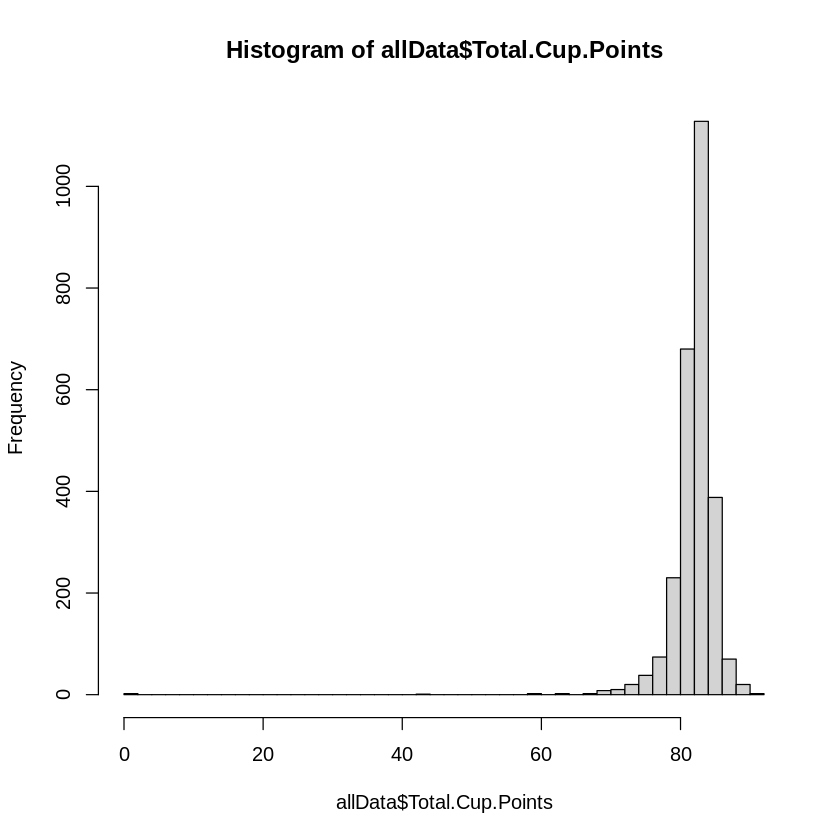

In [ ]:
hist(allData$Total.Cup.Points, breaks = 50)

In [ ]:
install.packages("MASS")
install.packages("survival")
install.packages("fitdistrplus")
library(MASS)
library(survival)
library(fitdistrplus)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
ajuste <- fitdist(allData$Total.Cup.Points, "exp")
ajuste

Fitting of the distribution ' exp ' by maximum likelihood 
Parameters:
      estimate   Std. Error
rate 0.0121836 0.0002338796

In [ ]:
ajuste$estimate

rate 
0.0121836

In [ ]:
prueba <- gofstat(ajuste)
prueba$kstest

1-mle-exp 
"rejected"

In [ ]:
prueba$chisqpvalue

[1] 0


<h3>Vemos con un p-value menor a 0,05 podemos decir que los datos del total de puntos por taza no pertenecen a una distribución exponencial


<h3>Por otra parte tambien miraremos


<center>H0 : No hay diferencia entre las proporciones de las categorías Sabor y Total de puntos

<center>H1:Existe diferencia entre las proporciones de las categorías Sabor y Total de puntos.

In [ ]:
# Incluimos el argumento:
chisq.test(allData$Flavor, allData$Total.Cup.Points, rescale.p = TRUE)

Warning message in chisq.test(allData$Flavor, allData$Total.Cup.Points, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allData$Flavor and allData$Total.Cup.Points
X-squared = 48692, df = 6300, p-value < 2.2e-16


Rechazamos la hipotesis nula y decimos que hay diferencia entre las proporciones de las categorias

## Prueba de independencia

<center>
<h3>H0:
El pais de origen es independiente a la especie

<h3>H1:
El pais de origen es dependiente a la especie

In [ ]:
with(allData, table(Species,Country.of.Origin))

         Country.of.Origin
Species   Brazil Burundi China Colombia Costa Rica Cote d?Ivoire Ecuador
  Arabica    264       4    32      366        102             2       2
  Robusta      0       0     0        0          0             0       4
         Country.of.Origin
Species   El Salvador Ethiopia Guatemala Haiti Honduras India Indonesia Japan
  Arabica          42       89       362    12      106     2        40     2
  Robusta           0        0         0     0        0    26         0     0
         Country.of.Origin
Species   Kenya Laos Malawi Mauritius Mexico Myanmar Nicaragua Panama
  Arabica    50    6     22         2    472      16        52      8
  Robusta     0    0      0         0      0       0         0      0
         Country.of.Origin
Species   Papua New Guinea Peru Philippines Rwanda Taiwan
  Arabica                2   20          10      2    150
  Robusta                0    0           0      0      0
         Country.of.Origin
Species   Tanzania, United R

In [ ]:
with(allData, chisq.test(table(Species,Country.of.Origin)))


Warning message in chisq.test(table(Species, Country.of.Origin)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(Species, Country.of.Origin)
X-squared = 1574.3, df = 35, p-value < 2.2e-16


Con un nivel de confianza del 99% la evidencia nos sugiere que rechazamos la hipotesis nula y podriamos decir que el pais de origen y la especie son dependientes

##Prueba de Signos


<h3>
<center>
H0:mediana = 0

<h3>
<center>
H1:mediana ≠ 0


In [ ]:
install.packages("BSDA")

library(BSDA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:TeachingDemos’:

    z.test


The following object is masked from ‘package:datasets’:

    Orange




In [ ]:
SIGN.test(allData$Total.Cup.Points,md=0.9,alternative = "two.sided",conf.level = 0.95)


	One-sample Sign-Test

data:  allData$Total.Cup.Points
s = 2675, p-value = 4.441e-16
alternative hypothesis: true median is not equal to 0.9
95 percent confidence interval:
 82.42 82.58
sample estimates:
median of x 
       82.5 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level L.E.pt U.E.pt
Lower Achieved CI     0.9468  82.42  82.58
Interpolated CI       0.9500  82.42  82.58
Upper Achieved CI     0.9513  82.42  82.58


rechazamos la hipotesis nula y con un nivel de confianza del $a=0.05$ podemos decir que 